In [1]:
import os

In [6]:
cwd = os.getcwd()
# file_name = 'C:\Users\aqnan\Downloads\Fishku-MachineLearning-master\Dataset'

# source_path = os.path.join(cwd, file_name)

source_path = os.path.join(cwd, 'Fishku\\Fishku-MachineLearning-master\\Dataset')
train_path = os.path.join(source_path, "Gills\\train")
test_path = os.path.join(source_path, "Gills\\test")

'C:\\Users\\aqnan\\Downloads\\Fishku-MachineLearning-master\\Dataset\\Gills\\train'

In [7]:
# Directory with fresh/non-fresh training pictures
train_segar_dir = os.path.join(train_path, "segar")
train_kurang_segar_dir = os.path.join(train_path, "kurang-segar")
train_busuk_dir = os.path.join(train_path, "busuk")
train_segar_dir

'C:\\Users\\ASUS\\Desktop\\Bangkit\\Fishku\\Fishku-MachineLearning-master\\Dataset\\Gills\\train\\segar'

In [8]:
test_segar_dir = os.path.join(test_path, "segar")
test_kurang_segar_dir = os.path.join(test_path, "kurang-segar")
test_busuk_dir = os.path.join(test_path, "busuk")

In [9]:
train_segar_fnames = os.listdir(train_segar_dir)
train_kurang_segar_fnames = os.listdir(train_kurang_segar_dir)
train_busuk_fnames = os.listdir(train_busuk_dir)


print(train_segar_fnames[:10])
print(train_kurang_segar_fnames[:10])
print(train_busuk_fnames[:10])

['1.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '2.jpg']
['51.jpg', '52.jpg', '53.jpg', '54.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '61.jpg', '62.jpg']
['101.jpg', '102.jpg', '103.jpg', '104.jpg', '106.jpg', '107.jpg', '108.jpg', '109.jpg', '111.jpg', '112.jpg']


In [10]:
# total numbers in training and test set

print(f"total training segar images : {len(os.listdir(train_segar_dir))}")
print(f"total training kurang-segar images : {len(os.listdir(train_kurang_segar_dir))}")
print(f"total training busuk images : {len(os.listdir(train_busuk_dir))}")
print()
print(f"total test segar images : {len(os.listdir(test_segar_dir))}")
print(f"total test kurang-segar images : {len(os.listdir(test_kurang_segar_dir))}")
print(f"total test busuk images : {len(os.listdir(test_busuk_dir))}")

total training segar images : 40
total training kurang-segar images : 40
total training busuk images : 40

total test segar images : 10
total test kurang-segar images : 10
total test busuk images : 10


In [11]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

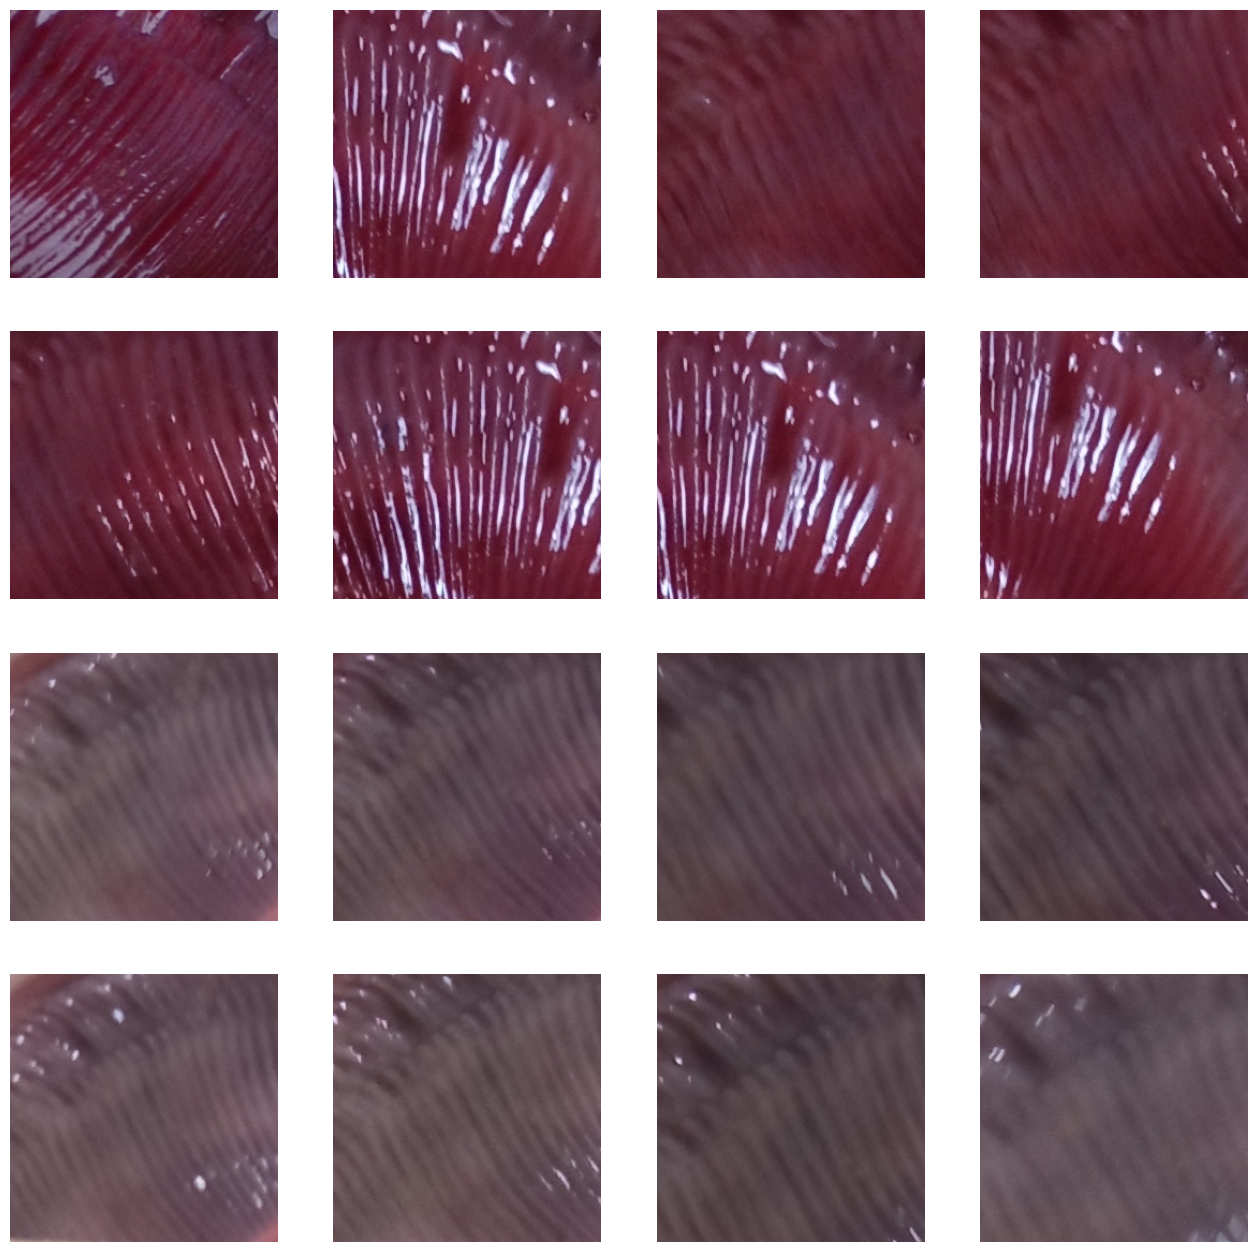

In [12]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_segar_pix = [os.path.join(train_segar_dir, fname)
                for fname in train_segar_fnames[ pic_index-8:pic_index]
               ]

next_kurang_segar_pix = [os.path.join(train_kurang_segar_dir, fname)
                for fname in train_kurang_segar_fnames[ pic_index-8:pic_index]
               ]

next_busuk_segar_pix = [os.path.join(train_busuk_dir, fname)
                for fname in train_busuk_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_segar_pix+next_kurang_segar_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

# Data Preprocessing

In [13]:
import tensorflow as tf

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescaling the Image
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)


test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_path,
                                                    batch_size=20,
                                                    class_mode='categorical',  # Use categorical for multi-class classification
                                                    target_size=(150, 150)
                                                   # classes=['segar', 'kurang-segar', 'busuk']  # Specify class names
                                                   )

# train_generator = train_datagen.flow_from_directory(train_path,
#                                                     batch_size=20,
#                                                     class_mode='binary',
#                                                     target_size=(150, 150))


validation_generator =  test_datagen.flow_from_directory(test_path,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150)
                                                       #  classes=['segar', 'kurang-segar', 'busuk']
                                                        )


Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [ ]:
test_path

'C:\\Users\\aqnan\\Downloads\\Fishku-MachineLearning-master\\Dataset\\Gills\\test'

# Pre Trained Model

In [40]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B3
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Prepare the pre-trained model

# pre_trained_model = EfficientNetV2B3(include_top = False,
#                                      weights = 'imagenet',
#                                      input_shape = (150, 150, 3))

pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = 'imagenet')

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [41]:
from tensorflow.keras import Model

# last_output = pre_trained_model.output

x = tf.keras.layers.Flatten()(last_output)
#x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(150, activation = 'relu')(x)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
x = tf.keras.layers.Dense(64,activation = "relu")(x)
x = tf.keras.layers.Dense(3, activation = 'softmax')(x)



# Append the dense network to the base model
model = Model(pre_trained_model.input, x)

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 74, 74, 32)   864         ['input_5[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                            

 batch_normalization_104 (Batch  (None, 16, 16, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 16, 16, 32)  96          ['conv2d_105[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_99 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_99[0][0]'] 
                                                                                                  
 activation_101 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_101[0][0]']
                                                                                                  
 activatio

 conv2d_114 (Conv2D)            (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_117 (Conv2D)            (None, 16, 16, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_normalization_114 (Batch  (None, 16, 16, 48)  144         ['conv2d_114[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_117 (Batch  (None, 16, 16, 96)  288         ['conv2d_117[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                                                                                  
 conv2d_128 (Conv2D)            (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 7, 7, 128)   384         ['conv2d_128[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_128 (Activation)    (None, 7, 7, 128)    0           ['batch_normalization_128[0][0]']
                                                                                                  
 conv2d_129 (Conv2D)            (None, 7, 7, 128)    114688      ['activation_128[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 activation_138 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_138[0][0]']         
                                                                                                  
 batch_normalization_139 (Batch  (None, 7, 7, 160)   480         ['conv2d_139[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_139 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_139[0][0]']
                                                                                                  
 conv2d_13

 batch_normalization_149 (Batch  (None, 7, 7, 160)   480         ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_149[0][0]']
                                                                                                  
 conv2d_145 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_150 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_149[0][0]']         
                                                                                                  
 batch_normalization_145 (Batch  (None, 7, 7, 160)   480         ['conv2d_145[0][0]']             
 Normaliza

 conv2d_155 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_160 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_159[0][0]']         
                                                                                                  
 batch_normalization_155 (Batch  (None, 7, 7, 192)   576         ['conv2d_155[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_160 (Batch  (None, 7, 7, 192)   576         ['conv2d_160[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

In [42]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [43]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
#     steps_per_epoch=5,
    epochs=15,
#     validation_steps=5,
    verbose=1
)

Epoch 1/15
6/6 [==============================] - 9s 795ms/step - loss: 3.8816 - accuracy: 0.3750 - val_loss: 2.3972 - val_accuracy: 0.3333
Epoch 2/15
6/6 [==============================] - 3s 540ms/step - loss: 1.2969 - accuracy: 0.3917 - val_loss: 1.3003 - val_accuracy: 0.5667
Epoch 3/15
6/6 [==============================] - 3s 524ms/step - loss: 0.9659 - accuracy: 0.6000 - val_loss: 0.7386 - val_accuracy: 0.6333
Epoch 4/15
6/6 [==============================] - 3s 517ms/step - loss: 0.7541 - accuracy: 0.6333 - val_loss: 0.7207 - val_accuracy: 0.6000
Epoch 5/15
6/6 [==============================] - 3s 533ms/step - loss: 0.6524 - accuracy: 0.7250 - val_loss: 0.5464 - val_accuracy: 0.8000
Epoch 6/15
6/6 [==============================] - 3s 541ms/step - loss: 0.6274 - accuracy: 0.6750 - val_loss: 0.8010 - val_accuracy: 0.7000
Epoch 7/15
6/6 [==============================] - 3s 517ms/step - loss: 0.6417 - accuracy: 0.7417 - val_loss: 0.5383 - val_accuracy: 0.7000
Epoch 8/15
6/6 [====

Text(0.5, 1.0, 'Training and validation loss')

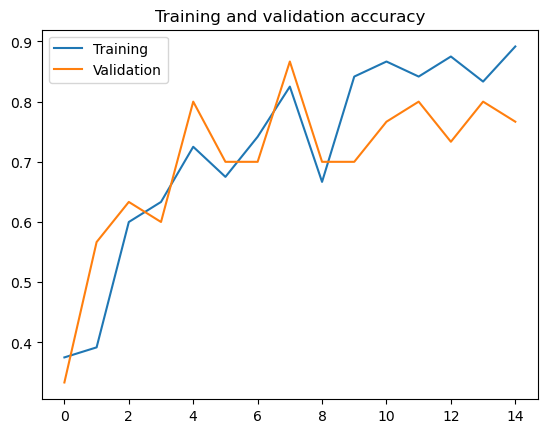

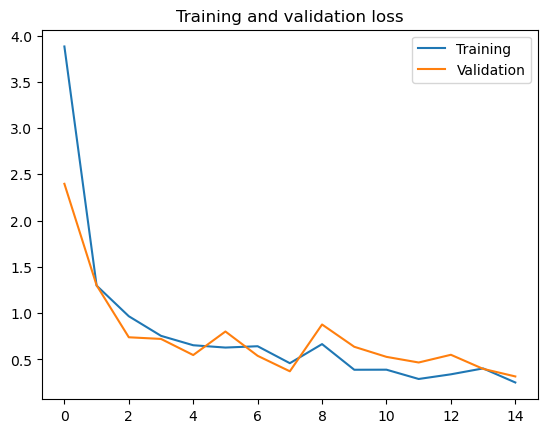

In [44]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

# Model

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Conv and Pooling Layer
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Dense Layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation = 'relu'),
    #tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)       

In [ ]:
model.compile(optimizer= tf.optimizers.Adam(learning_rate = 3e-4) ,
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
#     steps_per_epoch=5,
    epochs=30,
#     validation_steps=5,
    verbose=1
)

Epoch 1/30
6/6 [==============================] - 3s 435ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0974 - val_accuracy: 0.9667
Epoch 2/30
6/6 [==============================] - 2s 373ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0671 - val_accuracy: 0.9667
Epoch 3/30
6/6 [==============================] - 2s 398ms/step - loss: 0.0134 - accuracy: 0.9917 - val_loss: 0.1727 - val_accuracy: 0.9667
Epoch 4/30
6/6 [==============================] - 2s 385ms/step - loss: 0.0187 - accuracy: 0.9917 - val_loss: 0.1202 - val_accuracy: 0.9667
Epoch 5/30
6/6 [==============================] - 2s 389ms/step - loss: 0.0113 - accuracy: 0.9917 - val_loss: 0.0851 - val_accuracy: 0.9667
Epoch 6/30
6/6 [==============================] - 3s 432ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.1479 - val_accuracy: 0.9667
Epoch 7/30
6/6 [==============================] - 3s 417ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0946 - val_accuracy: 0.9667
Epoch 8/30
6/6 [====

Text(0.5, 1.0, 'Training and validation loss')

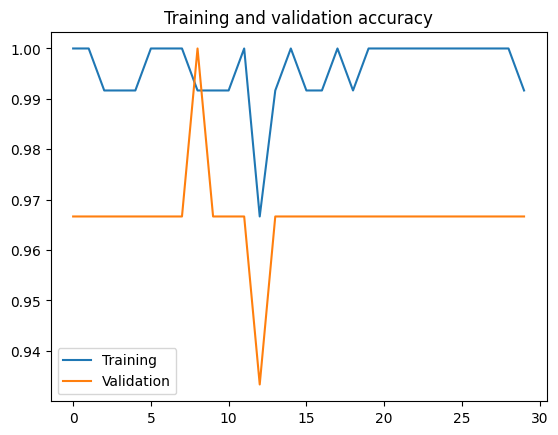

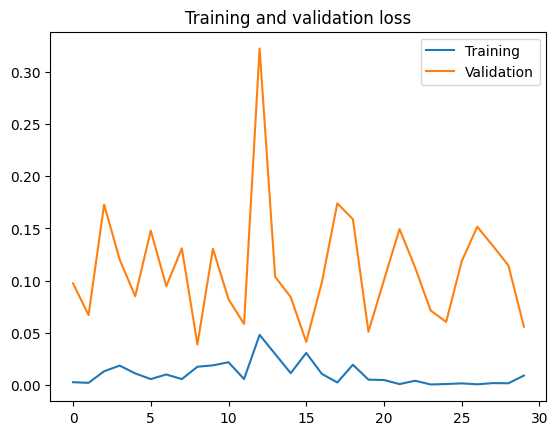

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

# Model Prediction

In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.preprocessing import image

# Load the image you want to classify
img_path = 'C:\\Users\\aqnan\\Downloads\\Fishku-MachineLearning-master\\Dataset\\Gills\\train\\segar\\16.jpg'
img = image.load_img(img_path, target_size=(150, 150))

# Preprocess the image to be in the correct format for prediction
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255

# Perform the prediction
classes = model.predict(x, batch_size=10)

# Define the class labels
class_labels = ['segar', 'kurang-segar', 'busuk']  # Update with your class labels

# Get the predicted class
predicted_class = class_labels[np.argmax(classes)]

# Print the prediction result
print(f"The predicted class is: {predicted_class}")


1/1 [==============================] - 0s 250ms/step
The predicted class is: segar


In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
    # predicting images
    path='/content/' + fn
    img=load_img(path, target_size=(150, 150))

    x=img_to_array(img)
    x /= 255
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(classes[0])

    if classes[0]>0.5:
        print(fn + " is a dog")
    else:
        print(fn + " is a cat")

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import os

images_dir = os.path.join(source_path, "Eyes\\images")
images = os.listdir(images_dir)

print(images)

for i in images:
    path = os.path.join(images_dir, i)

    img = load_img(path, target_size=(150,150))
    x = img_to_array(img)
    x = x / 255
    x = np.expand_dims(x, axis = 0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(i + " is a dog")
    else:
        print(i + " is a cat")

In [ ]:
# CODE BLOCK FOR OLDER VERSIONS OF SAFARI

import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import os

images_dir = os.path.join(source_path, "Eyes\\images")
images = os.listdir(images_dir)

print(images)

for i in images:
    print()
    # predicting images
    path = '/tmp/images/' + i
    img = load_img(path, target_size=(150, 150))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(i + " is a dog")
    else:
        print(i + " is a cat")